In [114]:
import math

import IPython.display
import sympy

sympy.init_printing()

# Jm, Am, A0, S0, Ag, Sg = sympy.symbols('J_m A_m A_0 S_0 A_g S_g', real=True)
Jm, Am = sympy.symbols('J_m A_m', real=True, positive=True)
A0, S0, Ag, Sg = sympy.symbols('A_0 S_0 A_g S_g', real=True, positive=True)

In [152]:
def get_Q(A_from, A_to, J_max) :
    # return the amount of speed taken to go from one acceleration to another, and the time it took
    w = sympy.sign(A_to - A_from)
    t = abs(A_to - A_from) / J_max
    q = (A_to + A_from) * t / 2
    return q, t, w

In [249]:
def get_V(A_base, A_delta, W_delta, J_max) :
    # return the amount of speed taken to make a acceleration from A_base to A_top and
    # a deceleration to go back to the same A_base value
    A_top = A_base + A_delta * W_delta
    t = 2 * A_delta / J_max
    q = (A_base + A_top) * t / 2
    return q, t

In [140]:
val = {'J_m': 1, 'A_m': 2, 'A_0': -1, 'A_g': -2, 'S_0': 0, 'S_g': sympy.Rational(3, 2)}
val = {Jm: 1, Am: 2, A0: 3, S0: 0, Ag: -1, Sg: sympy.Rational(3, 2)}

La première étape est de déterminer $Q_i$, l'aire nécessaire à la rejointe de l'accélération maximale

In [118]:
if A0.subs(val) > Am.subs(val) :
    Qi, Ti, Wi = get_Q(A0, Am, Jm)
    Ap = Am
elif A0.subs(val) < -Am.subs(val) :
    Qi, Ti, Wi = get_Q(A0, -Am, Jm)
    Ap = -Am
else :
    Qi, Ti, Wi = 0, 0, 0
    Ap = A0
    
print(f"Qi = {Qi} = {Qi.subs(val)}")
print(f"Ti = {Ti} = {Ti.subs(val)}")
print(f"Wi = {Wi} = {Wi.subs(val)}")

Qi = (A_0 + A_m)*Abs(A_0 - A_m)/(2*J_m) = 5/2
Ti = Abs(A_0 - A_m)/J_m = 1
Wi = sign(-A_0 + A_m) = -1


Puis de déterminer $Q_r$, l'aire nécessaire à la rejointe de l'accélération finale $A_g$ à partir de l'accélération post initiale $A_p$

In [120]:
Qr, Tr, Wr = get_Q(Ap, Ag, Jm)

print(f"Qr = {Qr} = {Qr.subs(val)}")
print(f"Tr = {Tr} = {Tr.subs(val)}")
print(f"Wr = {Wr} = {Wr.subs(val)}")

Qr = (A_g + A_m)*Abs(A_g - A_m)/(2*J_m) = 3/2
Tr = Abs(A_g - A_m)/J_m = 3
Wr = sign(A_g - A_m) = -1


L'aire restante est donc donnée par $Q_l = S_g - S_0 - Q_i - Q_r$

In [180]:
Ql = Sg - S0 - Qi - Qr
print(f"Ql = {Ql} = {Ql.subs(val)}")

Ql = -S_0 + S_g - (A_0 + A_m)*Abs(A_0 - A_m)/(2*J_m) - (A_g + A_m)*Abs(A_g - A_m)/(2*J_m) = -5/2


Il faut donc combler $Q_l$ avec un triangle

In [223]:
Ab = Ag if ( 0 <= Ql.subs(val) * Wr.subs(val) ) else Ap
Ab

In [224]:

if 0 < Ql.subs(val) :
    Qv, Tv, Wv = get_V(Ab, Ad, 1, Jm)
elif Ql.subs(val) < 0 :
    Qv, Tv, Wv = get_V(Ab, Ad, -1, Jm)
else :
    Qv, Tv, Wv = 0, 0, 0
    
print(f"Qv = {Qv}")
print(f"Tv = {Tv}")
print(f"Wv = {Wv}")

Qv = A_d*(-A_d + 2*A_g)/J_m
Tv = 2*A_d/J_m
Wv = -1


La résolution générale pour un triangle est donnée par

In [250]:
Ad = sympy.symbols('A_d', real=True, positive=True)
Ab, Wd, Qx = sympy.symbols('A_b W_d Q_x', real=True)

Qv, Tv = get_V(Ab, Ad, Wd, Jm)
Qv

In [251]:
res = sympy.solve(sympy.Eq(Qx, Qv), Ad)

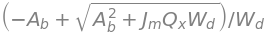

In [252]:
res[0].simplify()

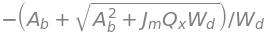

In [253]:
res[1].simplify()

In [242]:
cas = {
    Ab: Ag if ( 0 <= Ql.subs(val) * Wr.subs(val) ) else Ap,
    Wd: sympy.sign(Ql),
    Qx: Ql,
}

In [243]:
res[0].subs(cas).subs(val).simplify()

In [247]:
res[1].subs(cas).subs(val).simplify()

In [37]:
(Qt - Qr - 2* Qc).subs(val)

In [23]:
tc1, tc2 = sympy.solve(Qt - Qr - 2* Qc, Tc)

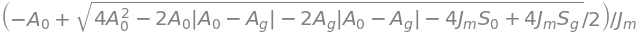

In [46]:
tc1.subs({'K_c': 1})

In [33]:
tc2.subs(val).subs({'K_c': 1})

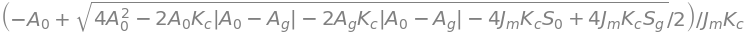

In [28]:
tc1

In [16]:
def get_V(Ag, Ad, k) :
    # return the amount of speed taken to make a acceleration to Az = Ag + k* Ad and
    # a deceleration to go back to the same value Ag
    Az = Ag + k * Ad
    return (Ag + Az) * (k * k * Ad) / Jm

In [17]:
Ad, k, Sr = sympy.symbols('A_d k S_r')
eq = sympy.Eq(get_V(Ag, Ad, k), Sr)
eq

raaaah A_d*k + A_g -2


In [18]:
get_V(Ag, Ad, k).subs({'A_g': 1, 'A_d': 3, 'k': -1, 'J_m': 1})

raaaah A_d*k + A_g -2


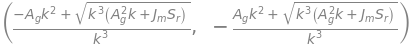

In [32]:
s1, s2 = sympy.solve(eq, Ad)
s1, s2

In [33]:
s1.subs({'A_g': -1, 'S_r': 3, 'J_m': 1, 'k': 1}).simplify()

In [35]:
s2.subs({'A_g': -1, 'S_r': 3, 'J_m': 1, 'k': -1}).simplify()

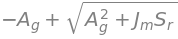

In [36]:
s1.subs({'k': 1}).simplify()

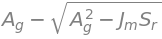

In [37]:
s1.subs({'k': -1}).simplify()

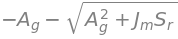

In [38]:
s2.subs({'k': 1}).simplify()

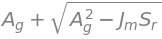

In [39]:
s2.subs({'k': -1}).simplify()